In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
os.listdir('../data')

['df.xlsx',
 'holidays_events.csv',
 'items.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train+oil.xlsx',
 'train.csv',
 'transactions.csv']

## Load the data into DataFrame

In [3]:
train = pd.read_excel('../data/df.xlsx')

In [4]:
train.shape

(1347, 116)

In [5]:
train.head()

,date,index,id,store_nbr,item_nbr,unit_sales,unit_sales1,unit_sales2,unit_sales3,unit_sales4,...,city_state_Quito_Pichincha,city_state_Riobamba_Chimborazo,city_state_Salinas_Santa Elena,city_state_Santo Domingo_Santo Domingo de los Tsachilas,store_type_A,store_type_B,store_type_C,store_type_D,store_type_E,dcoilwtico
0,2014-01-02,16377457,16377457,44,1503844,966.149,0.000,0.000,0.000,0.000,...,1,0,0,0,1,0,0,0,0,95.14
1,2014-01-03,16442863,16442863,44,1503844,663.405,966.149,0.000,0.000,0.000,...,1,0,0,0,1,0,0,0,0,93.66
2,2014-01-04,16511061,16511061,44,1503844,1075.000,663.405,966.149,0.000,0.000,...,1,0,0,0,1,0,0,0,0,93.66
3,2014-01-05,16578789,16578789,44,1503844,892.608,1075.000,663.405,966.149,0.000,...,1,0,0,0,1,0,0,0,0,93.66
4,2014-01-06,16642520,16642520,44,1503844,261.554,892.608,1075.000,663.405,966.149,...,1,0,0,0,1,0,0,0,0,93.12


In [6]:
df = store_sub = train[(train['store_nbr'] == 44) & (train['item_nbr'] == 1503844)]

In [7]:
store_sub = train[(train['store_nbr'] == 44) & (train['item_nbr'] == 1503844)]
store_sub.reset_index(drop = True, inplace = True)

In [8]:
store_sub.head()

,date,index,id,store_nbr,item_nbr,unit_sales,unit_sales1,unit_sales2,unit_sales3,unit_sales4,...,city_state_Quito_Pichincha,city_state_Riobamba_Chimborazo,city_state_Salinas_Santa Elena,city_state_Santo Domingo_Santo Domingo de los Tsachilas,store_type_A,store_type_B,store_type_C,store_type_D,store_type_E,dcoilwtico
0,2014-01-02,16377457,16377457,44,1503844,966.149,0.000,0.000,0.000,0.000,...,1,0,0,0,1,0,0,0,0,95.14
1,2014-01-03,16442863,16442863,44,1503844,663.405,966.149,0.000,0.000,0.000,...,1,0,0,0,1,0,0,0,0,93.66
2,2014-01-04,16511061,16511061,44,1503844,1075.000,663.405,966.149,0.000,0.000,...,1,0,0,0,1,0,0,0,0,93.66
3,2014-01-05,16578789,16578789,44,1503844,892.608,1075.000,663.405,966.149,0.000,...,1,0,0,0,1,0,0,0,0,93.66
4,2014-01-06,16642520,16642520,44,1503844,261.554,892.608,1075.000,663.405,966.149,...,1,0,0,0,1,0,0,0,0,93.12


## View data as a function of time 

D:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


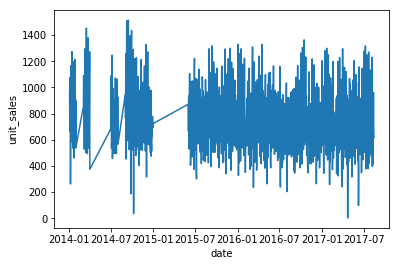

In [9]:
ax = sns.lineplot(x = store_sub['date'], y = store_sub['unit_sales'], ci  = None)

Text(0.5, 1.0, 'Sales by month')

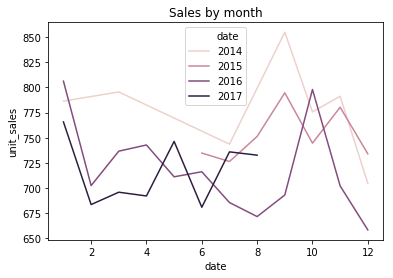

In [10]:
ax = sns.lineplot(x = store_sub['date'].dt.month , y = store_sub['unit_sales'], hue = store_sub['date'].dt.year, ci  = None)
ax.set_title('Sales by month')

Text(0.5, 1.0, 'Sales by day of the week')

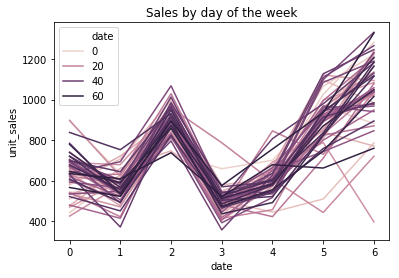

In [11]:
ax = sns.lineplot(x = store_sub['date'].dt.dayofweek , y = store_sub['unit_sales'], hue = store_sub['date'].dt.weekofyear, ci  = None)
ax.set_title('Sales by day of the week')

Text(0.5, 1.0, 'Sales by day of month')

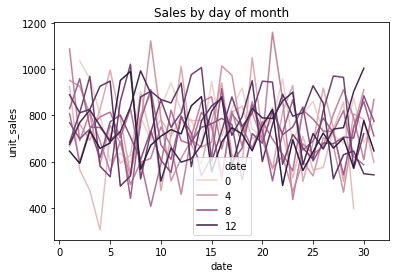

In [12]:
ax = sns.lineplot(x = store_sub['date'].dt.day , y = store_sub['unit_sales'], hue = store_sub['date'].dt.month, ci  = None)
ax.set_title('Sales by day of month')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

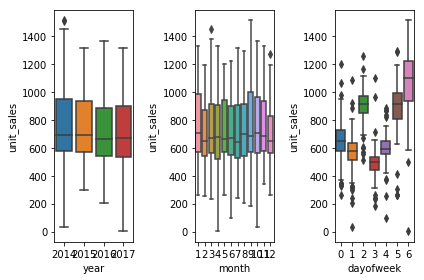

In [13]:
store_sub['year'] = [d.year for d in store_sub.date]
store_sub['month'] = [d.month for d in store_sub.date]
store_sub['dayofyear'] = [d.dayofyear for d in store_sub.date]
store_sub['dayofweek'] = [d.dayofweek for d in store_sub.date]

# Draw Plot
fig, axes = plt.subplots(1, 3)
sns.boxplot(x = 'year', y = 'unit_sales', data = store_sub, ax = axes[0])
sns.boxplot(x = 'month', y = 'unit_sales', data = store_sub, ax = axes[1])
sns.boxplot(x = 'dayofweek', y = 'unit_sales', data = store_sub, ax = axes[2])
fig.tight_layout()

In [14]:
store_sub.drop(['year', 'month', 'dayofweek', 'dayofyear'], axis = 1, inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Fill in the missing data 

In [15]:
store_sub.head(50)

,date,index,id,store_nbr,item_nbr,unit_sales,unit_sales1,unit_sales2,unit_sales3,unit_sales4,...,city_state_Quito_Pichincha,city_state_Riobamba_Chimborazo,city_state_Salinas_Santa Elena,city_state_Santo Domingo_Santo Domingo de los Tsachilas,store_type_A,store_type_B,store_type_C,store_type_D,store_type_E,dcoilwtico
0,2014-01-02,16377457,16377457,44,1503844,966.1490,0.0000,0.0000,0.0000,0.0000,...,1,0,0,0,1,0,0,0,0,95.14
1,2014-01-03,16442863,16442863,44,1503844,663.4050,966.1490,0.0000,0.0000,0.0000,...,1,0,0,0,1,0,0,0,0,93.66
2,2014-01-04,16511061,16511061,44,1503844,1075.0000,663.4050,966.1490,0.0000,0.0000,...,1,0,0,0,1,0,0,0,0,93.66
3,2014-01-05,16578789,16578789,44,1503844,892.6080,1075.0000,663.4050,966.1490,0.0000,...,1,0,0,0,1,0,0,0,0,93.66
4,2014-01-06,16642520,16642520,44,1503844,261.5540,892.6080,1075.0000,663.4050,966.1490,...,1,0,0,0,1,0,0,0,0,93.12
5,2014-01-07,16705308,16705308,44,1503844,646.7160,261.5540,892.6080,1075.0000,663.4050,...,1,0,0,0,1,0,0,0,0,93.31
6,2014-01-08,16768213,16768213,44,1503844,1165.2097,646.7160,261.5540,892.6080,1075.0000,...,1,0,0,0,1,0,0,0,0,91.90
7,2014-01-09,16830673,16830673,44,1503844,620.6760,1165.2097,646.7160,261.5540,892.6080,...,1,0,0,0,1,0,0,0,0,91.36
8,2014-01-10,16892999,16892999,44,1503844,602.2430,620.6760,1165.2097,646.7160,261.5540,...,1,0,0,0,1,0,0,0,0,92.39
9,2014-01-11,16960548,16960548,44,1503844,1090.4050,602.2430,620.6760,1165.2097,646.7160,...,1,0,0,0,1,0,0,0,0,92.39


In [16]:
# create a list of dates which contains the missing dates in the original dataframe
date_diff = store_sub['date'] - store_sub.shift(periods = 1, axis = 0)['date']

dates = [store_sub['date'].iloc[0]]
for idx, d in enumerate(date_diff[1:]):
    if d == pd.Timedelta('1 days'):
        # no break in the dates
        dates.append(store_sub['date'].iloc[idx + 1])
    else:
        # missing data
        while d > pd.Timedelta('0 days'):
            dates.append(store_sub['date'].iloc[idx + 1] - d + pd.Timedelta('1 days'))
            d -= pd.Timedelta('1 days')
            
dates = pd.DataFrame(dates, columns = ['date'])

In [17]:
store_sub = pd.merge(dates, store_sub, how = 'outer', on = 'date')

try:
    store_sub.drop('onpromotion', axis = 1, inplace = True)
except Exception:
    pass

In [18]:
print(store_sub.shape)
store_sub.head(60)

(1344, 115)


,date,index,id,store_nbr,item_nbr,unit_sales,unit_sales1,unit_sales2,unit_sales3,unit_sales4,...,city_state_Quito_Pichincha,city_state_Riobamba_Chimborazo,city_state_Salinas_Santa Elena,city_state_Santo Domingo_Santo Domingo de los Tsachilas,store_type_A,store_type_B,store_type_C,store_type_D,store_type_E,dcoilwtico
0,2014-01-02,16377457.0,16377457.0,44.0,1503844.0,966.1490,0.0000,0.0000,0.0000,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,95.14
1,2014-01-03,16442863.0,16442863.0,44.0,1503844.0,663.4050,966.1490,0.0000,0.0000,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.66
2,2014-01-04,16511061.0,16511061.0,44.0,1503844.0,1075.0000,663.4050,966.1490,0.0000,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.66
3,2014-01-05,16578789.0,16578789.0,44.0,1503844.0,892.6080,1075.0000,663.4050,966.1490,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.66
4,2014-01-06,16642520.0,16642520.0,44.0,1503844.0,261.5540,892.6080,1075.0000,663.4050,966.1490,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.12
5,2014-01-07,16705308.0,16705308.0,44.0,1503844.0,646.7160,261.5540,892.6080,1075.0000,663.4050,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.31
6,2014-01-08,16768213.0,16768213.0,44.0,1503844.0,1165.2097,646.7160,261.5540,892.6080,1075.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,91.90
7,2014-01-09,16830673.0,16830673.0,44.0,1503844.0,620.6760,1165.2097,646.7160,261.5540,892.6080,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,91.36
8,2014-01-10,16892999.0,16892999.0,44.0,1503844.0,602.2430,620.6760,1165.2097,646.7160,261.5540,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,92.39
9,2014-01-11,16960548.0,16960548.0,44.0,1503844.0,1090.4050,602.2430,620.6760,1165.2097,646.7160,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,92.39


In [19]:
def seasonal_mean(ts, i, n, m, w, alpha):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    # weekly average
    ts_week = ts[i::-n]
    denom = w*(w**(len(ts_week) - 1) - 1)/(w-1)
    ts_week = sum(x for x in (list(map(lambda x: x[1]*(w**x[0]), [x for x in enumerate(ts_week)]))) if not np.isnan(x)) / denom
    print(ts_week)
    
    # monthly
    ts_month = ts[i::-m]
    denom = w*(w**(len(ts_month) - 1) - 1)/(w-1)
    ts_month = sum(x for x in (list(map(lambda x: x[1]*(w**x[0]), [x for x in enumerate(ts_month)]))) if not np.isnan(x)) / denom
    print(ts_month)
    print('---')
    
    avg = ((alpha * ts_week) + ((1 - alpha) * ts_month))
    return avg

for idx, row in store_sub.iterrows():
    if type(row['unit_sales']) != np.float:
        print(idx)
        store_sub.at[idx, 'unit_sales'] = seasonal_mean(store_sub['unit_sales'], idx, 7, 30, 0.7, 0.)

30
1014.7947295696804
966.1489999999999
---
31
1176.0622005527043
663.405
---
32
575.5497441768655
1075.0
---
33
617.9903861034347
892.6080000000001
---
34
960.6800979470984
261.554
---
35
585.8569842054018
646.716
---
36
586.6060472034907
1165.2097
---
37
997.2527261909057
620.6759999999999
---
38
991.1942907936966
602.243
---
39
755.6551337492338
1090.405
---
40
717.0194921207313
1273.189
---
41
708.5701495330135
826.3919999999999
---
42
606.5490950982091
581.054
---
43
783.3317219507884
991.7418999999999
---
44
869.2163576059867
535.784
---
45
858.9505609876342
622.446
---
46
869.470338667945
1030.838
---
47
906.1175408153898
1194.892
---
48
748.6296668227269
459.9320000000001
---
49
598.2141478201227
666.378
---
50
851.4659195117463
925.2419
---
51
760.2094638976677
543.6080000000001
---
52
781.6316477117476
573.8240000000001
---
53
922.22522914432
945.8650000000001
---
54
1000.5247153440595
1212.514
---
55
654.2475975264636
641.27
---
56
619.9142724773257
592.365
---
57
874.952678

---
483
746.0620245325463
887.436614540297
---
484
805.964422993793
702.7255221743168
---
485
694.4571435975641
676.5067688660525
---
486
762.2538367791587
906.9222136403588
---
487
765.0213569357556
690.1918470502676
---
488
800.0765454154428
687.6444102921653
---
489
703.4203601656952
778.0905762266972
---
490
788.4744015354797
912.3316608595842
---
491
774.9927527475058
767.6644886492895
---
492
689.0720311780333
847.9250317200967
---
493
805.6543498381411
872.5420881602641
---
494
742.5725039697871
702.90688026165
---
495
766.3469048779754
729.3884220106611
---
496
725.8214249843177
874.9173624852534
---
497
825.6315793330847
831.9932125371317
---
498
772.7942735180185
651.9401070131704
---
499
736.7279313411311
795.0282235355419
---
500
825.7206713349799
850.1910639372729
---
501
730.6728168572264
682.8566823175004
---
502
755.25936001767
696.858749728967
---
503
770.550206235047
796.053974265544
---
504
827.5400692943122
848.956666783712
---
505
736.5380235663091
612.546249361437

In [20]:
store_sub.head(60)

,date,index,id,store_nbr,item_nbr,unit_sales,unit_sales1,unit_sales2,unit_sales3,unit_sales4,...,city_state_Quito_Pichincha,city_state_Riobamba_Chimborazo,city_state_Salinas_Santa Elena,city_state_Santo Domingo_Santo Domingo de los Tsachilas,store_type_A,store_type_B,store_type_C,store_type_D,store_type_E,dcoilwtico
0,2014-01-02,16377457.0,16377457.0,44.0,1503844.0,966.1490,0.0000,0.0000,0.0000,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,95.14
1,2014-01-03,16442863.0,16442863.0,44.0,1503844.0,663.4050,966.1490,0.0000,0.0000,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.66
2,2014-01-04,16511061.0,16511061.0,44.0,1503844.0,1075.0000,663.4050,966.1490,0.0000,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.66
3,2014-01-05,16578789.0,16578789.0,44.0,1503844.0,892.6080,1075.0000,663.4050,966.1490,0.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.66
4,2014-01-06,16642520.0,16642520.0,44.0,1503844.0,261.5540,892.6080,1075.0000,663.4050,966.1490,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.12
5,2014-01-07,16705308.0,16705308.0,44.0,1503844.0,646.7160,261.5540,892.6080,1075.0000,663.4050,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.31
6,2014-01-08,16768213.0,16768213.0,44.0,1503844.0,1165.2097,646.7160,261.5540,892.6080,1075.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,91.90
7,2014-01-09,16830673.0,16830673.0,44.0,1503844.0,620.6760,1165.2097,646.7160,261.5540,892.6080,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,91.36
8,2014-01-10,16892999.0,16892999.0,44.0,1503844.0,602.2430,620.6760,1165.2097,646.7160,261.5540,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,92.39
9,2014-01-11,16960548.0,16960548.0,44.0,1503844.0,1090.4050,602.2430,620.6760,1165.2097,646.7160,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,92.39


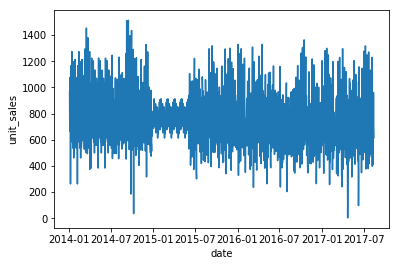

In [21]:
sns.lineplot(x = 'date', y = 'unit_sales', data = store_sub)

## Determine if the data is stationary

In [22]:
from statsmodels.tsa.stattools import adfuller, kpss

In [23]:
# ADF test
result = adfuller(store_sub['unit_sales'], autolag = None, maxlag = 7)
dfoutput = pd.Series(result[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in result[4].items():
   dfoutput['Critical Value (%s)'% key] = value
print(dfoutput)
    
# since p-value less than 0.05, reject the null hypothesis that the data is not difference stationary

print('--------------------------------------------')

# KPSS test
result = kpss(store_sub['unit_sales'], regression = 'c', lags = 7)
kpss_output = pd.Series(result[0:3], index = ['Test Statistic', 'p-value', 'Lags Used'])
for key, value in result[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print(kpss_output)

# since p-value less than 0.05, reject the null hypothesis that the data is trend stationary

Test Statistic                -1.053115e+01
p-value                        9.144760e-19
Lags Used                      7.000000e+00
Number of Observations Used    1.336000e+03
Critical Value (1%)           -3.435254e+00
Critical Value (5%)           -2.863706e+00
Critical Value (10%)          -2.567923e+00
dtype: float64
--------------------------------------------
Test Statistic           3.458992
p-value                  0.010000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


D:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [24]:
from pandas.plotting import autocorrelation_plot

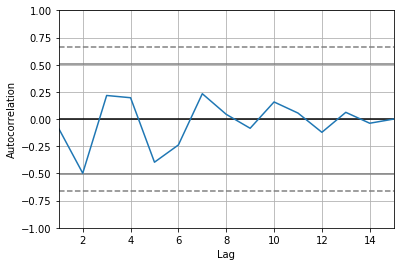

In [25]:
fig = autocorrelation_plot(store_sub['unit_sales'].iloc[:15])

In [32]:
from pysal.model.spreg import ols, ml_error, ml_lag
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [33]:
train_ratio = 0.7
train, test = store_sub.iloc[:round(train_ratio * store_sub.shape[0]), :], store_sub.iloc[round(train_ratio * store_sub.shape[0]):, :]
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

print(train.shape)
print(test.shape)

(941, 115)
(403, 115)


In [34]:
p, d, q, s = 7, 2, 0, 7
model  = SARIMAX(endog = train['unit_sales'], seasonal_order = (p, d, q, s))
model_fit = model.fit(disp = 0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                        unit_sales   No. Observations:                  941
Model:             SARIMAX(1, 0, 0)x(7, 2, 0, 7)   Log Likelihood               -6222.751
Date:                           Wed, 02 Oct 2019   AIC                          12463.502
Time:                                   16:06:05   BIC                          12506.989
Sample:                                        0   HQIC                         12480.091
                                           - 941                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0858      0.024      3.543      0.000       0.038       0.133
ar.S.L7       -1.1856      0.029    -40.343      0.000      -1.243      -1.128
ar.S.L14      -1.0049      0.047    -21.573      0.000      -1.096      -0.914
ar.S.L21      -0.7831      0.059    -13.269      0.000      -0.899      -0.667
ar.S.L28      -0.7648      0.062    -12.300      0.000      -0.887      -0.643
ar.S.L35      -0.7163      0.061    -11.698      0.000      -0.836      -0.596
ar.S.L42      -0.5634      0.051    -10.968      0.000      -0.664      -0.463
ar.S.L49      -0.2688      0.032     -8.477      0.000      -0.331      -0.207
sigma2      3.903e+04   1366.575     28.561      0.000    3.64e+04    4.17e+04
===================================================================================
Ljung-Box (Q):                      250.74   Jarque-Bera (JB):               148.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.00
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                 0
count   941.000000
mean      1.503671
std     217.478080
min    -928.402960
25%    -103.874497
50%      -6.108278
75%     101.235350
max    1165.137275


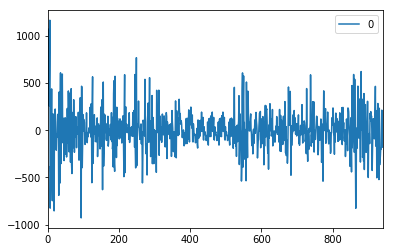

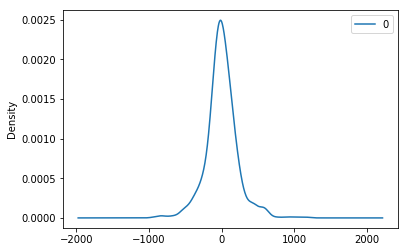

In [35]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind = 'kde')
print(residuals.describe())

In [36]:
history = list(train['unit_sales'])
predictions = []

for i in range(len(test)):
    print(i)
    model = SARIMAX(history, seasonal_order = (p, d, q, s))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[i]['unit_sales']
    history.append(obs)
    print('predicted = {}, expected = {}'.format(yhat, obs))

0
predicted = 959.8282163125598, expected = 942.623
1
predicted = 996.4619151569399, expected = 615.776
2
predicted = 392.04624481539554, expected = 458.133
3
predicted = 294.1457530791808, expected = 450.214
4
predicted = 785.0537248029682, expected = 597.49
5
predicted = 303.7392647911633, expected = 523.031
6
predicted = 625.2697554919989, expected = 509.357
7
predicted = 925.549693244001, expected = 771.357
8
predicted = 705.7793902017031, expected = 875.5
9
predicted = 476.693791598321, expected = 875.5
10
predicted = 295.8198410531347, expected = 818.2139999999999
11
predicted = 816.2121397034357, expected = 489.47
12
predicted = 387.716217254232, expected = 738.2860000000001
13
predicted = 475.5405262579829, expected = 503.01
14
predicted = 741.7675886764965, expected = 551.918
15
predicted = 686.4709766108585, expected = 871.113
16
predicted = 745.2963141348258, expected = 1033.419
17
predicted = 825.2976545880065, expected = 479.929
18
predicted = 426.2434373755358, expected =

predicted = 398.0223636957095, expected = 459.902
297
predicted = 538.0962658559586, expected = 643.685
298
predicted = 833.0729946637332, expected = 804.707
299
predicted = 728.4103726430742, expected = 978.315
300
predicted = 926.6685500492154, expected = 610.413
301
predicted = 573.3103607417037, expected = 592.9019999999999
302
predicted = 1048.0075726415039, expected = 919.13
303
predicted = 409.70801438122606, expected = 315.185
304
predicted = 592.5572487805404, expected = 449.956
305
predicted = 725.3435733515539, expected = 954.6189999999999
306
predicted = 981.3730811483765, expected = 858.8910000000001
307
predicted = 716.2971360958222, expected = 652.0
308
predicted = 555.120664880543, expected = 601.326
309
predicted = 970.4786422962079, expected = 1057.467
310
predicted = 329.3897301454495, expected = 477.521
311
predicted = 583.8405854075767, expected = 623.424
312
predicted = 867.6013190519964, expected = 809.7289999999999
313
predicted = 972.9958803100681, expected = 1

In [37]:
import math

error = mean_squared_error(test['unit_sales'], predictions)
print('Test MSE: {}'.format(error))
print('Test RMSE: {}'.format(math.sqrt(error)))

Test MSE: 51076.866350376615
Test RMSE: 226.00191669624533
